# SI618 Project Comprehensive Credit Risk Assessment Using Loan Application Data



**Group Member:** Xiaoxu Ai(shirleyi), Selina Shan(sselina)

**Overview**

This project aims to conduct a comprehensive analysis of credit risk using detailed loan data from the U.S. Small Business Administration (SBA), which includes information on loan specifics like approval dates, terms, and amounts, as well as business demographics such as industry, size, and location. By combining this data with geographic and demographic data from U.S. states, we'll explore how regional factors affect loan performance and economic outcomes like job creation. The goal is to help banks improve their lending strategies by identifying patterns in loan defaults and successes, thus promoting fair and effective lending practices that minimize financial risks and support economic growth.

**Motivation**

Our motivation for choosing this topic to analyze stems from our shared background in business studies during our undergraduate years. We are both familiar with fundamental business principles and the crucial role of data-driven decision-making. We want to applying business theories in real-world scenarios. Additionally, we both interest in positions related to business analytics and and feel that this dataset provides an excellent starting point.

Q1: How does loan performance vary across different states? and which states have the highest default rates?

Q2: What are the key factors that influence the approval or denial of a loan?

Q3: How many loans were given to each industry sector?


**Data Sources**
1. SBAnational.csv


URLs: [https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied/data]

SBAnational.csv is from the U.S. Small Business Administration (SBA). It includes data on loan details (e.g., approval date, term, disbursement amount, and status), business information (e.g., name, location, industry, and size), and outcomes (e.g., jobs created or retained, and loan performance). The dataset allows for analysis of loan performance, business demographics, and the impact of loans on job creation and economic growth.

2. census data - shape file

URL: https://www2.census.gov/geo/tiger/TIGER2024/STATE/


## Data Manipulation

In [8]:
import pandas as pd

data = pd.read_csv("SBAnational.csv")

print(data.head())

   LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate  ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97        1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97        1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97        1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97        1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97        1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate 

In [9]:
# import os

# dataset_path = "/root/.cache/kagglehub/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied/versions/2"
# print(os.listdir(dataset_path))

In [10]:
# import packages
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import geopandas as gpd


shapefile_path = "/Users/xiaoxuai/Documents/umich/courses/SI618/si618-dataset/tl_2024_us_state.shp"

gdf = gpd.read_file(shapefile_path)

print(gdf.head())

  REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS           NAME  \
0      3        5      54  01779805    54  0400000US54     WV  West Virginia   
1      3        5      12  00294478    12  0400000US12     FL        Florida   
2      2        3      17  01779784    17  0400000US17     IL       Illinois   
3      2        4      27  00662849    27  0400000US27     MN      Minnesota   
4      3        5      24  01714934    24  0400000US24     MD       Maryland   

  LSAD  MTFCC FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0   00  G4000        A   62266513826    488918898  +38.6472854  -080.6183274   
1   00  G4000        A  138965379385  45968913048  +28.3989775  -082.5143005   
2   00  G4000        A  143778206717   6216848695  +40.1028754  -089.1526108   
3   00  G4000        A  206244791203  18937236061  +46.3159573  -094.1996043   
4   00  G4000        A   25151223822   6979843236  +38.9466584  -076.6744939   

                                      

# Data Description - data size

In [12]:
print(f"data shape: {data.shape}")
print(f"gdf shape: {gdf.shape}")

data shape: (4830, 27)
gdf shape: (56, 16)


# Data Description about Missing Value

In [13]:
# count of missing values for each column
print(data.isnull().sum(), "\n")
# Remove rows where columns contain missing values beside ChgOffDate
data_cleaned = data.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'])
print(data_cleaned.isnull().sum())
# count of missing values for each column
print(gdf.isnull().sum())
# there is no missing values in gdf


LoanNr_ChkDgt           0
Name                    4
City                    0
State                   0
Zip                     0
Bank                    4
BankState               4
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               1
LowDoc                  0
ChgOffDate           3972
DisbursementDate       10
DisbursementGross       0
BalanceGross            0
MIS_Status             16
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64 

LoanNr_ChkDgt           0
Name                    0
City                    0
State                   0
Zip                     0
Bank                    0
BankState               0
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                   

In [14]:
# Check the difference in the number of rows
print("Columns in original data not in cleaned data:")
print(set(data.columns) - set(data_cleaned.columns))

print("Columns in cleaned data not in original data:")
print(set(data_cleaned.columns) - set(data.columns))

print("\nNumber of rows in original data:", data.shape[0])
print("Number of rows in cleaned data:", data_cleaned.shape[0])

Columns in original data not in cleaned data:
set()
Columns in cleaned data not in original data:
set()

Number of rows in original data: 4830
Number of rows in cleaned data: 4799


## Data Visualization

 How does loan performance vary across different states? and which states have the highest default rates?

/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/1215100901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Defaulted'] = data_cleaned['MIS_Status'] == 'CHGOFF'
/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/1215100901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['PaidInFull'] = data_cleaned['MIS_Status'] == 'P I F'


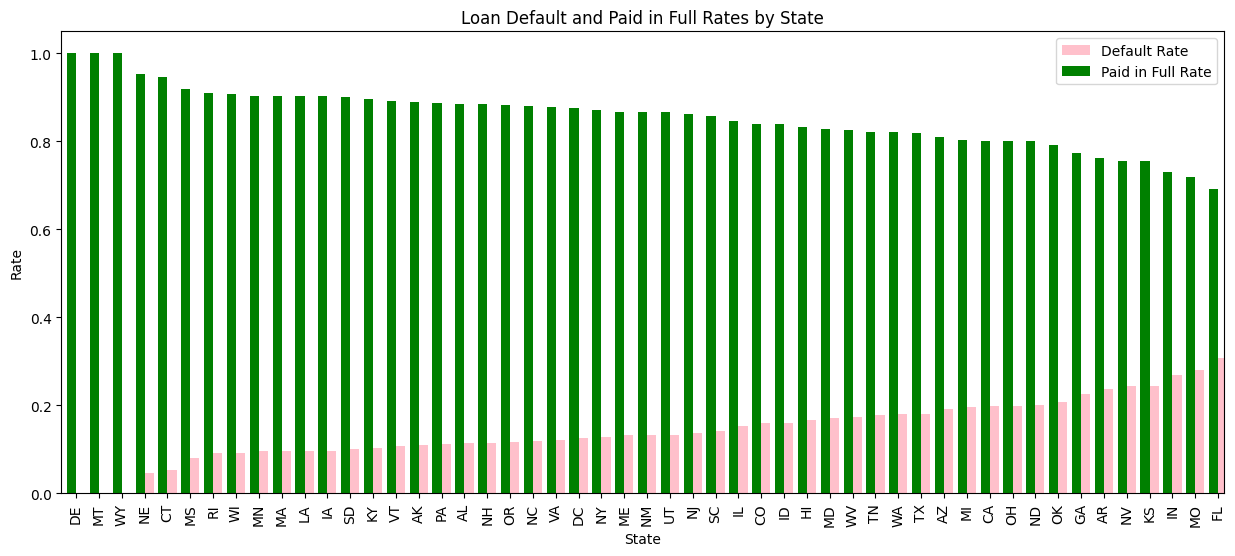

States with the highest default rates:
       Defaulted  PaidInFull
State                       
FL      0.308429    0.691571
MO      0.280702    0.719298
IN      0.269231    0.730769
KS      0.244444    0.755556
NV      0.243902    0.756098


In [15]:
data_cleaned['Defaulted'] = data_cleaned['MIS_Status'] == 'CHGOFF'

# Create another column to mark loans as 'PaidInFull' if 'MIS_Status' is 'PIF'
data_cleaned['PaidInFull'] = data_cleaned['MIS_Status'] == 'P I F'

# Group by state and calculate default rate and paid in full rate
state_loan_outcomes = data_cleaned.groupby('State').agg({
    'Defaulted': 'mean',  # Average of the Defaulted column to get default rate
    'PaidInFull': 'mean'  # Average of the PaidInFull column to get paid in full rate
})

# Sorting the results for better visualization
state_loan_outcomes = state_loan_outcomes.sort_values(by='Defaulted')

# Plotting the default rates by state
plt.figure(figsize=(15, 6))
state_loan_outcomes['Defaulted'].plot(kind='bar', color='pink', position=0, width=0.4, label='Default Rate')
state_loan_outcomes['PaidInFull'].plot(kind='bar', color='green', position=1, width=0.4, label='Paid in Full Rate')
plt.title('Loan Default and Paid in Full Rates by State')
plt.xlabel('State')
plt.ylabel('Rate')
plt.legend()
plt.show()

sorted_state_default_rates = state_loan_outcomes.sort_values(by='Defaulted', ascending=False)
print("States with the highest default rates:")
print(sorted_state_default_rates.head())



Florida (FL) has the highest loan default rate at approximately 27.52%. Washington, D.C. (DC) and Georgia (GA) also have high default rates, at around 23.98% and 23.89%, respectively.

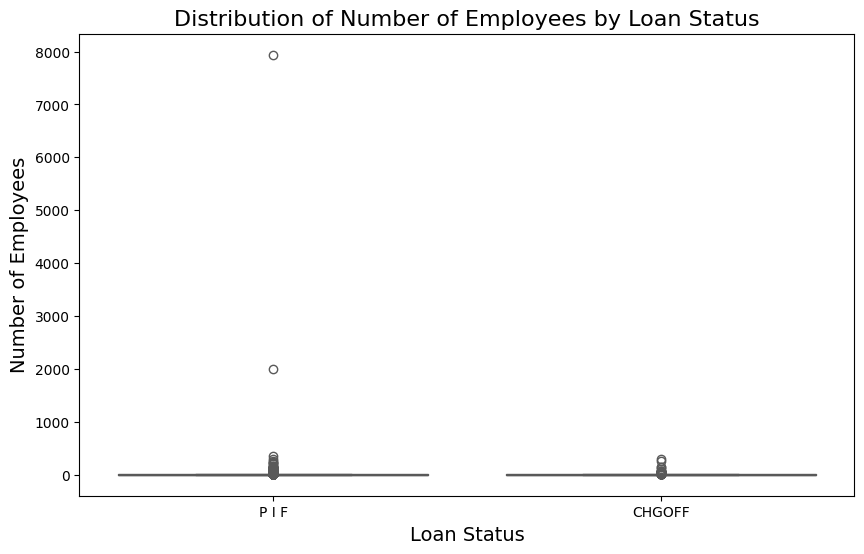

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MIS_Status', y='NoEmp', hue='MIS_Status', data=data_cleaned, palette='Set2', legend=False)

# Add titles and labels
plt.title('Distribution of Number of Employees by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.show()

The box plot shows that businesses with fewer employees (lower NoEmp) are more likely to have loans charged off (CHGOFF) compared to those that are paid in full (PIF). The median number of employees for CHGOFF loans is lower than for PIF loans, suggesting smaller businesses are at higher risk of default. Additionally, the wider spread for CHGOFF indicates greater variability in business size among defaulted loans.


/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/1714315027.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['NAICS_Sector'] = data_cleaned['NAICS'].apply(map_naics_sector)
/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/1714315027.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_loan_counts.index, y=sector_loan_counts.values, palette="viridis")


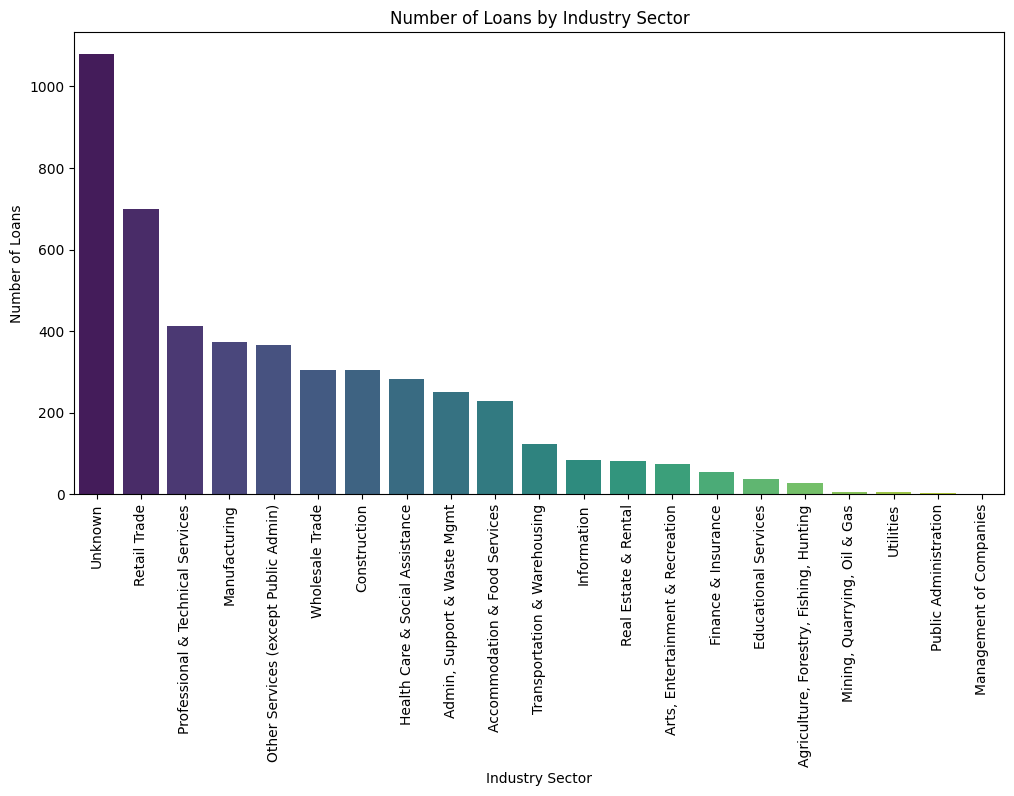

Number of loans given to each industry sector:

NAICS_Sector
Unknown                                    1079
Retail Trade                                699
Professional & Technical Services           413
Manufacturing                               374
Other Services (except Public Admin)        365
Wholesale Trade                             305
Construction                                304
Health Care & Social Assistance             283
Admin, Support & Waste Mgmt                 251
Accommodation & Food Services               228
Transportation & Warehousing                124
Information                                  83
Real Estate & Rental                         82
Arts, Entertainment & Recreation             73
Finance & Insurance                          54
Educational Services                         38
Agriculture, Forestry, Fishing, Hunting      28
Mining, Quarrying, Oil & Gas                  6
Utilities                                     5
Public Administration      

In [17]:
# Define NAICS sector mapping function
def map_naics_sector(naics_code):
    try:
        naics_prefix = int(str(naics_code)[:2])  # Extract first two digits
        if naics_prefix == 11:
            return "Agriculture, Forestry, Fishing, Hunting"
        elif naics_prefix == 21:
            return "Mining, Quarrying, Oil & Gas"
        elif naics_prefix == 22:
            return "Utilities"
        elif naics_prefix == 23:
            return "Construction"
        elif 31 <= naics_prefix <= 33:
            return "Manufacturing"
        elif naics_prefix == 42:
            return "Wholesale Trade"
        elif 44 <= naics_prefix <= 45:
            return "Retail Trade"
        elif 48 <= naics_prefix <= 49:
            return "Transportation & Warehousing"
        elif naics_prefix == 51:
            return "Information"
        elif naics_prefix == 52:
            return "Finance & Insurance"
        elif naics_prefix == 53:
            return "Real Estate & Rental"
        elif naics_prefix == 54:
            return "Professional & Technical Services"
        elif naics_prefix == 55:
            return "Management of Companies"
        elif naics_prefix == 56:
            return "Admin, Support & Waste Mgmt"
        elif naics_prefix == 61:
            return "Educational Services"
        elif naics_prefix == 62:
            return "Health Care & Social Assistance"
        elif naics_prefix == 71:
            return "Arts, Entertainment & Recreation"
        elif naics_prefix == 72:
            return "Accommodation & Food Services"
        elif naics_prefix == 81:
            return "Other Services (except Public Admin)"
        elif naics_prefix == 92:
            return "Public Administration"
        else:
            return "Unknown"
    except:
        return "Unknown"

# Apply the mapping function
data_cleaned['NAICS_Sector'] = data_cleaned['NAICS'].apply(map_naics_sector)

sector_loan_counts = data_cleaned['NAICS_Sector'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_loan_counts.index, y=sector_loan_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Industry Sector')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by Industry Sector')
plt.show()

print("Number of loans given to each industry sector:\n")
print(sector_loan_counts)

# Merge the data

In [18]:
# merge data
merged_df = data_cleaned.merge(gdf, left_on="State", right_on="STUSPS", how="left")

print(merged_df[['State', 'DisbursementGross', 'NAME', 'geometry']].head())
print(merged_df.columns)

  State DisbursementGross      NAME  \
0    IN       $60,000.00    Indiana   
1    IN       $40,000.00    Indiana   
2    IN      $287,000.00    Indiana   
3    OK       $35,000.00   Oklahoma   
4    FL      $229,000.00    Florida   

                                            geometry  
0  POLYGON ((-86.3296 38.1818, -86.33037 38.1821,...  
1  POLYGON ((-86.3296 38.1818, -86.33037 38.1821,...  
2  POLYGON ((-86.3296 38.1818, -86.33037 38.1821,...  
3  POLYGON ((-95.78676 36.99931, -95.78601 36.999...  
4  MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...  
Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'Defaulted', 'PaidInFull', 'NAICS_Sector', 'REGION

# Part 2: Analysis

## Descriptive Statistics

### The following coding and results give us a general descriptive statistics (count, mean, std, min, max, variance) about the loan data for the main features.

In [19]:
# 1. Basic descriptive statistics for the loan dataset
loan_numeric_stats = data_cleaned.select_dtypes(include=['number']).describe().T
loan_numeric_stats['variance'] = data_cleaned.select_dtypes(include=['number']).var()
print("Loan Dataset Numeric Statistics:")
print(loan_numeric_stats)


Loan Dataset Numeric Statistics:
                count          mean           std           min           25%  \
LoanNr_ChkDgt  4799.0  1.016376e+09  9.388329e+06  1.000014e+09  1.008370e+09   
Zip            4799.0  4.739975e+04  3.150580e+04  0.000000e+00  2.078450e+04   
NAICS          4799.0  3.955842e+05  2.564515e+05  0.000000e+00  2.355100e+05   
ApprovalFY     4799.0  2.001319e+03  4.133690e+00  1.972000e+03  1.997000e+03   
Term           4799.0  9.067597e+01  6.690491e+01  0.000000e+00  6.000000e+01   
NoEmp          4799.0  1.037154e+01  1.193118e+02  0.000000e+00  2.000000e+00   
NewExist       4799.0  1.322567e+00  4.824269e-01  0.000000e+00  1.000000e+00   
CreateJob      4799.0  6.115857e-01  3.490593e+00  0.000000e+00  0.000000e+00   
RetainedJob    4799.0  8.733069e-01  5.228162e+00  0.000000e+00  0.000000e+00   
FranchiseCode  4799.0  2.066765e+03  1.100510e+04  0.000000e+00  1.000000e+00   
UrbanRural     4799.0  7.043134e-01  6.943800e-01  0.000000e+00  0.000000e+0

### We calculated the loan approval rate over the whole dataset, which is 82.39%.

In [20]:
# 2. Loan approval status distribution
print("\nLoan Approval Status Distribution:")
approval_dist = data_cleaned['MIS_Status'].value_counts()
print(approval_dist)
print(f"Approval Rate: {approval_dist['P I F'] / len(data_cleaned) * 100:.2f}%")


Loan Approval Status Distribution:
MIS_Status
P I F     3983
CHGOFF     816
Name: count, dtype: int64
Approval Rate: 83.00%


### The table shows the top 10 states ranked by default rate (Default_Rate_Pct), along with various metrics for each state:

Florida (FL) leads with the highest default rate at 27.52% and also has the most significant number of loans among these states, totaling 40,673. Close behind are the District of Columbia (DC) and Georgia (GA) with default rates of 23.98% and 23.89%, respectively, indicating a relatively high risk of loan defaults in these areas. Nevada (NV) also features prominently with a default rate of 23.27%. Other states including Illinois (IL), Michigan (MI), and the remaining in the top 10 all have default rates above 22%.
The top 10 states all have default rates between 20-28%
What's more, we can find that the average number of employees for these 10 states ranges from 8 - 24, which likely to be small business size.



In [21]:

# 3. State-level aggregation for Q1
print("\nState-level Loan Performance:")

# First, ensure numeric columns are properly converted
data_cleaned['DisbursementGross'] = pd.to_numeric(
    data_cleaned['DisbursementGross'].astype(str).str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
)
data_cleaned['Term'] = pd.to_numeric(data_cleaned['Term'], errors='coerce')
data_cleaned['NoEmp'] = pd.to_numeric(data_cleaned['NoEmp'], errors='coerce')
data_cleaned['ChgOffPrinGr'] = pd.to_numeric(data_cleaned['ChgOffPrinGr'], errors='coerce')

# Now perform the aggregation
state_performance = data_cleaned.groupby('State').agg({
    'MIS_Status': lambda x: (x == 'CHGOFF').mean() * 100,  # Default rate
    'DisbursementGross': 'mean',  # Average loan amount
    'Term': 'mean',  # Average loan term
    'NoEmp': 'mean',  # Average number of employees
    'ChgOffPrinGr': 'sum',  # Total charged off
    'LoanNr_ChkDgt': 'count'  # Count of loans
}).rename(columns={
    'MIS_Status': 'Default_Rate_Pct',
    'LoanNr_ChkDgt': 'Loan_Count'
}).sort_values('Default_Rate_Pct', ascending=False)

print(state_performance.head(10))  # Top 10 states by default rate


State-level Loan Performance:
       Default_Rate_Pct  DisbursementGross        Term      NoEmp  \
State                                                               
FL            30.842912       87029.519157   76.178161   7.501916   
MO            28.070175      153437.210526   85.175439   6.508772   
IN            26.923077      200111.250000  101.134615  10.538462   
KS            24.444444      144694.422222   96.000000  10.044444   
NV            24.390244      120197.195122   84.341463   7.073171   
AR            23.809524      107735.809524  100.666667   5.285714   
GA            22.695035      155485.517730   98.659574   6.907801   
OK            20.833333      196856.562500   94.625000   5.395833   
ND            20.000000      107713.333333   80.000000  17.266667   
OH            19.879518      141248.500000   88.186747   7.644578   

       ChgOffPrinGr  Loan_Count  
State                            
FL              0.0         522  
MO              0.0          57  
IN  

/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/2639865468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['DisbursementGross'] = pd.to_numeric(
/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/2639865468.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Term'] = pd.to_numeric(data_cleaned['Term'], errors='coerce')
/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/2639865468.py:10: SettingWithCopyWarning: 
A value is trying to 

#### The following industry sector analysis reveals a diverse distribution of loan applications across various industry sectors, with several sectors showing notably high representation. The most prominent sectors include:

Unclassified or missing NAICS codes (code 0) account for 198,267 entries, suggesting a significant portion of the dataset lacks proper industry classification.

Retail Trade (code 44) represents 83,867 applications, making it the largest properly classified sector. This aligns with retail's prominence in the small business landscape, where many entrepreneurs seek financing for inventory, expansion, or startup costs.

Other Services (code 81) follows with 71,754 applications. This category typically includes personal services, repair and maintenance businesses, and religious/civic organizations.

Professional, Scientific, and Technical Services (code 54) shows strong representation with 67,084 applications, reflecting the growth in knowledge-based entrepreneurship.

Accommodation and Food Services (code 72) accounts for 66,951 applications, highlighting the capital-intensive nature of restaurants and hospitality businesses.

Construction (code 23) and Healthcare/Social Assistance (code 62) also show substantial representation with 65,635 and 54,633 applications respectively.

The data reveals a long tail of less-represented industries, with numerous sectors having fewer than 10,000 applications. This distribution provides valuable context for understanding approval patterns and may indicate which industries are more active in seeking financing through this particular lending program.

In [22]:
# 4. Industry sector analysis for Q3
print("\nIndustry Sector Distribution:")
industry_dist = data_cleaned['NAICS'].apply(lambda x: str(x)[:2]).value_counts()  # Using first 2 digits of NAICS code
print(industry_dist)



Industry Sector Distribution:
NAICS
0     1079
44     430
54     413
81     365
42     305
23     304
62     283
45     269
56     251
72     228
33     203
48     112
32     105
51      83
53      82
71      73
31      66
52      54
61      38
11      28
49      12
21       6
22       5
92       4
55       1
Name: count, dtype: int64


## Inferential Statistics

**To Determine if There is a Significant Correlation Between Loan Term and the Likelihood of Default**

Hypotheses
Null Hypothesis (H0): There is no correlation between loan term and the likelihood of default.

Alternative Hypothesis (H1): There is a correlation between loan term and the likelihood of default.

Method: Logistic Regression

We used logistic Regression to analyze the relationship between loan term and the likelihood of default. The dependent variable (DefaultStatus) was set to 1 if the loan defaulted and 0 otherwise. The independent variable (Term) represents the duration of the loan in months.

Since the p-value is significantly below 0.05(0.00), we reject the null hypothesis, and conclude that there is a significant correlation between loan term and the likelihood of default. Longer loan terms appear to be linked to a lower probability of default. In other words, borrowers are more likely to repay the loan than default if they have longer repayment time.


In [23]:
import statsmodels.api as sm
data_cleaned.loc[:, 'Defaulted'] = data_cleaned['MIS_Status'].apply(lambda x: 1 if x == 'CHGOFF' else 0)
print("Variance of Term:", data_cleaned['Term'].var())
if data_cleaned['Term'].var() != 0:
    X = sm.add_constant(data_cleaned['Term'])  # Adds a constant term to the predictor
    y = data_cleaned['Defaulted']  # Response variable
    model = sm.Logit(y, X)
    try:
        result = model.fit()
        print(result.summary())
    except Exception as e:
        print("Error fitting the model:", str(e))
else:
    print("Term variable is not suitable due to zero variance.")

Variance of Term: 4476.266598545394
Optimization terminated successfully.
         Current function value: 0.382952
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Defaulted   No. Observations:                 4799
Model:                          Logit   Df Residuals:                     4797
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Apr 2025   Pseudo R-squ.:                  0.1601
Time:                        21:27:40   Log-Likelihood:                -1837.8
converged:                       True   LL-Null:                       -2188.1
Covariance Type:            nonrobust   LLR p-value:                2.254e-154
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3681      0.088      4.204      0.000       0.197      

/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/732289610.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_cleaned.loc[:, 'Defaulted'] = data_cleaned['MIS_Status'].apply(lambda x: 1 if x == 'CHGOFF' else 0)


**To Determine if There is a Significant Relationship Between Loan Success and Urban/Rural Status of the Borrower**

Hypotheses
Null Hypothesis (H0): There is no relationship between the success of a loan and the urban or rural status of the borrower.

Alternative Hypothesis (H1): There is a relationship between the success of a loan and the urban or rural status of the borrower.

Method: Chi-squared Test

According to the dataset, we know 1 = Urban, 2 = rural, 0 = undefined. We used a chi-squared test to analyze the association between the success of a loan (MIS_Status) and whether the borrower is located in an urban, rural, or undefined area (UrbanRural). The success of a loan is categorized into two groups: 'Paid in Full' (PIF) and 'Charge Off' (CHGOFF). The UrbanRural attribute has three categories. The chi-squared value is 39165.0119, and the p-vlaue is 0.00(the p-value is significantly below the commonly used significance level of 0.05) which shows that there is a significant difference between the observed frequencies and the expected frequencies calculated under the assumption of independence. In other words, the actual data show a substantial deviation from what would be expected if there were no association between the variables. We reject the null hypothesis. This indicates that there is a statistically significant relationship between the success of a loan and the urban/rural status of the borrower.

In [24]:
import scipy.stats as stats
# create a contingency table of observed counts
contingency_table = pd.crosstab(data_cleaned['MIS_Status'], data_cleaned['UrbanRural'])

# Print the contingency table to understand the distribution
print("Contingency Table:")
print(contingency_table)

# Conduct the chi-squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print("\nChi-squared Test Results:")
print(f"Chi-squared: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Contingency Table:
UrbanRural     0     1    2
MIS_Status                 
CHGOFF       196   492  128
P I F       1880  1574  529

Chi-squared Test Results:
Chi-squared: 154.8931
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies:
[[ 352.99354032  351.29318608  111.7132736 ]
 [1723.00645968 1714.70681392  545.2867264 ]]


## Graphical Analysis


We used a histogram to visualize the distribution of loan amounts across the dataset. It illustrates the distribution of loan amounts in the dataset. It reveals a strong right-skewed pattern, where the majority of loans fall within the lower loan amount range, particularly below $200,000. This suggests that most borrowers are requesting relatively modest amounts, possibly for operational costs, inventory purchases, or short-term funding needs.

A small number of loans with very large disbursement amounts (outliers on the far right) indicate that the dataset also includes some high-value loans, but these are relatively rare compared to smaller loans. This skewness emphasizes the importance of using appropriate transformations (e.g., logarithmic scale) when analyzing financial distributions like loan size.

   DisbursementGross
0            60000.0
1            40000.0
2           287000.0
3            35000.0
4           229000.0


/var/folders/6t/4259vmk95m7bf69ytwgpq1d00000gn/T/ipykernel_84554/531551011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['DisbursementGross'] = pd.to_numeric(


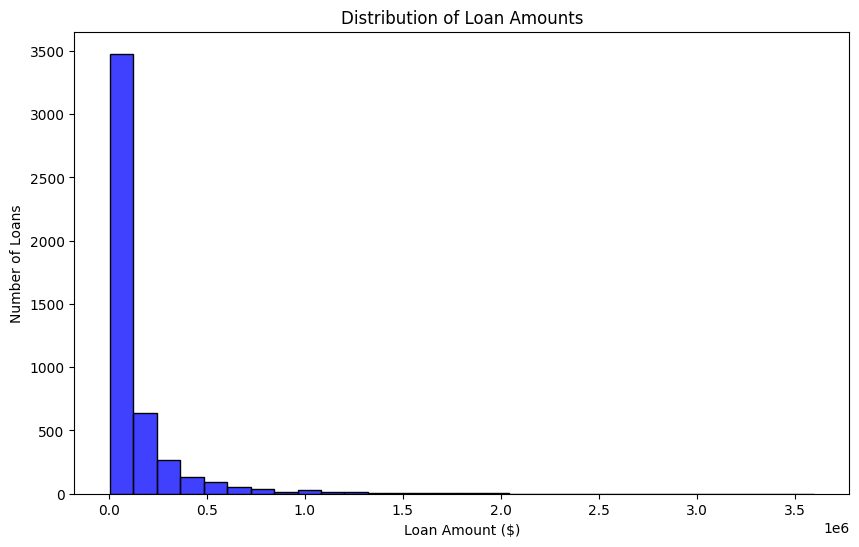

In [25]:
data_cleaned['DisbursementGross'] = pd.to_numeric(
    data_cleaned['DisbursementGross'].astype(str).str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
)
data_cleaned = data_cleaned.dropna(subset=['DisbursementGross'])
print(data_cleaned[['DisbursementGross']].head())

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['DisbursementGross'], bins=30, kde=False, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of Loans')
plt.show()

### To get a clear visualization about default rate distribution by state, we generated a heatmap by state.

Key observations:

There appears to be a geographical pattern with southeastern states showing the darkest red colors, suggesting they have the highest loan default rates (likely in the 20-27.5% range).

States in the Midwest and Northeast generally display medium-to-dark red shades, indicating moderate-to-high default rates.

Alaska appears to have a lighter pink shade, suggesting a lower default rate (possibly in the 7.5-10% range).

Hawaii also appears to have a relatively lighter shade.

There seems to be a cluster of states in the Deep South (including Florida, Georgia, Alabama, Mississippi) with notably high default rates.

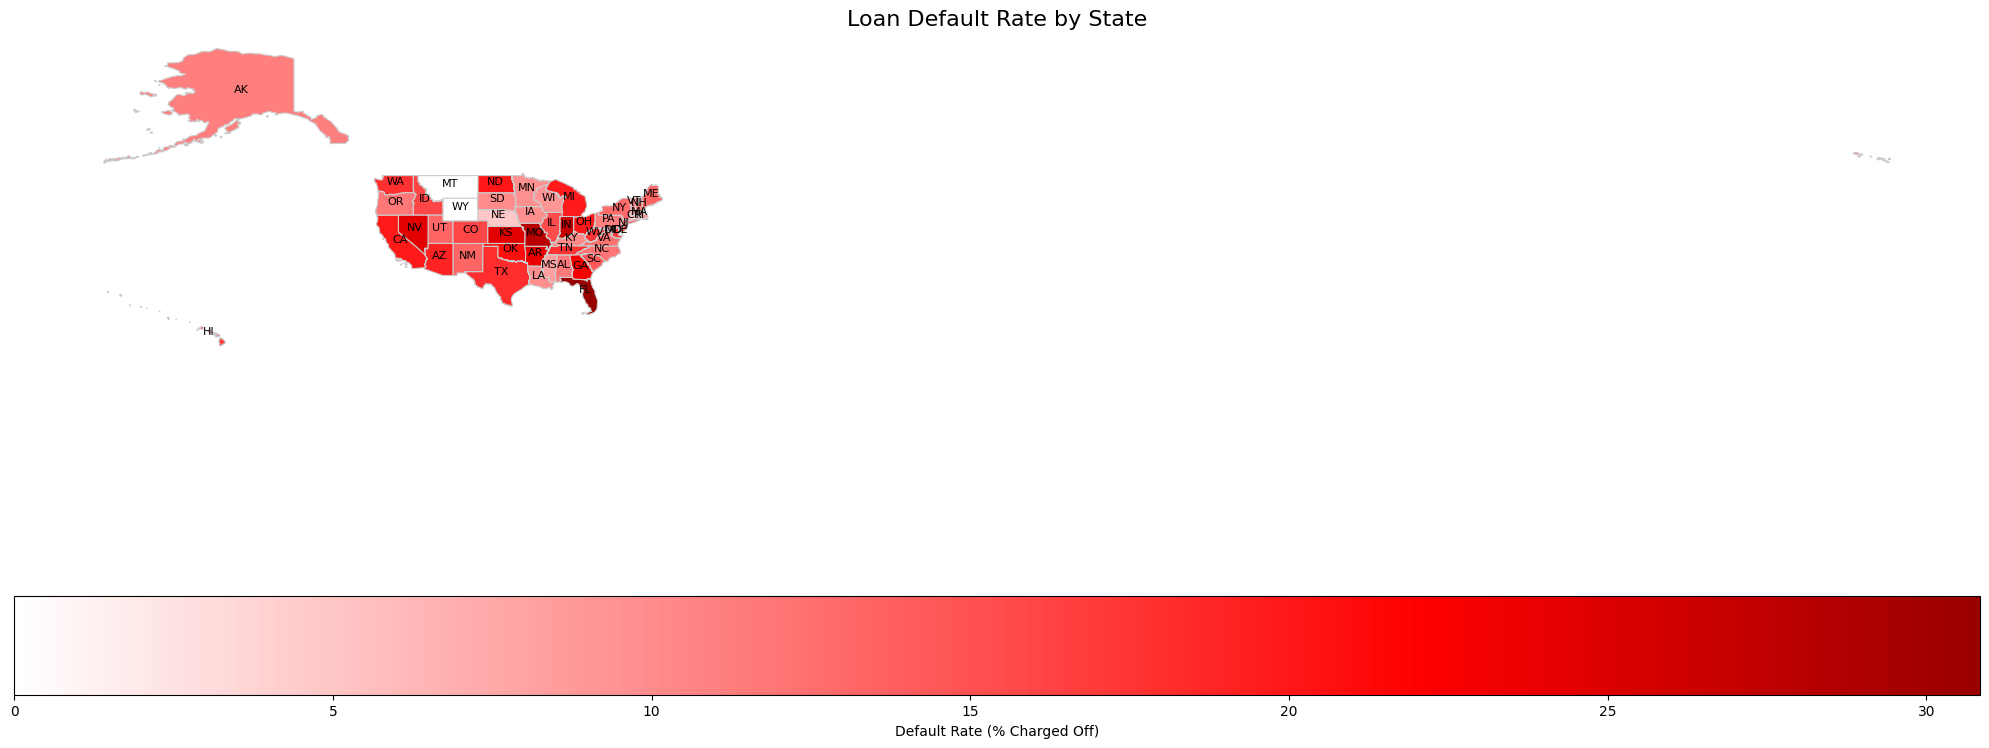

In [26]:
from matplotlib.colors import LinearSegmentedColormap


# Calculate default rate by state
default_by_state = data_cleaned.groupby('State')['Defaulted'].mean().reset_index()
default_by_state.columns = ['State', 'DefaultRate']

# Convert default rate to percentage
default_by_state['DefaultRate'] = default_by_state['DefaultRate'] * 100

# Merge with geographic data
# Check if we're dealing with state names or abbreviations
if len(default_by_state['State'].iloc[0]) == 2:  # State abbreviations like 'CA', 'NY'
    merged_df = pd.merge(
        gdf,
        default_by_state,
        left_on='STUSPS',
        right_on='State',
        how='left'
    )
else:  # State full names
    merged_df = pd.merge(
        gdf,
        default_by_state,
        left_on='NAME',
        right_on='State',
        how='left'
    )

# Create a custom colormap ranging from light to dark red for defaults
colors = ['#FFFFFF', '#FFCCCC', '#FF9999', '#FF6666', '#FF3333', '#FF0000', '#CC0000', '#990000']
cmap = LinearSegmentedColormap.from_list('default_reds', colors)

# Create the map
fig, ax = plt.subplots(1, figsize=(20, 16))

# Plot states with default rates
merged_df.plot(
    column='DefaultRate',
    cmap=cmap,
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': 'Default Rate (% Charged Off)', 'orientation': 'horizontal'}
)

# Add state labels
for idx, row in merged_df.iterrows():
    if pd.notna(row['DefaultRate']):
        plt.annotate(
            text=row['STUSPS'],  # Use state abbreviation for labels
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            horizontalalignment='center',
            color='black',
            fontsize=8
        )

# Set title and remove axes
plt.title('Loan Default Rate by State', fontsize=16)
plt.axis('off')

# Show the map
plt.tight_layout()
plt.savefig('default_rate_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

## Comparative Analysis

### We catogorize loan amount into small, medium, and large loan size, and compare the default rate acorss the three categories.
This data suggests an inverse relationship between loan size and default risk - as loan size increases, default risk decreases.

Small Loans have the highest default rate at 24.29%.

Medium Loans have a moderate default rate at 19.12%.

Large Loans have the lowest default rate at 11.06%.

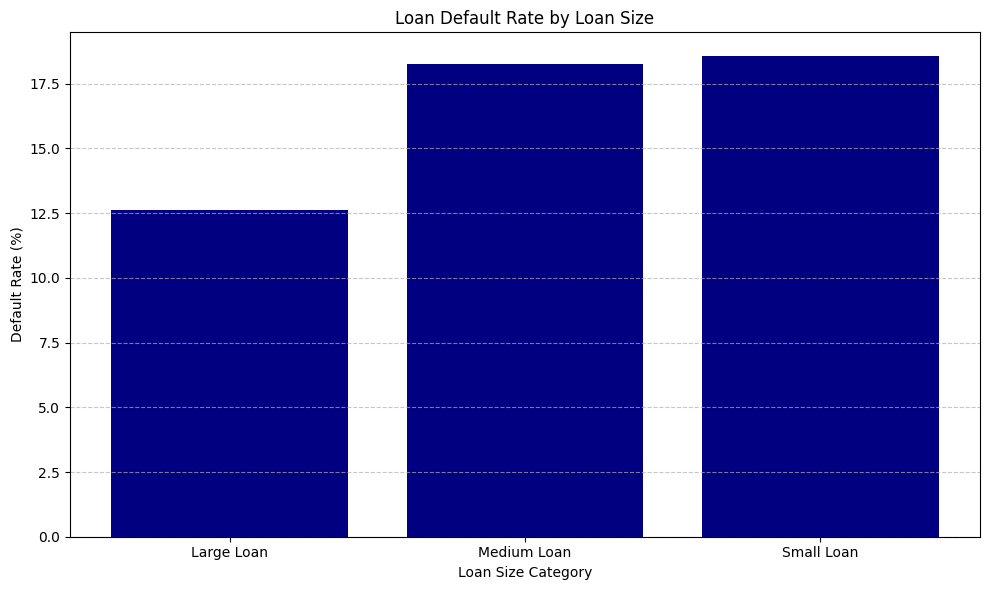

Default rates by loan size:
Large Loan: 12.61%
Medium Loan: 18.25%
Small Loan: 18.56%


In [27]:
# Create a function to catogorize loan amount size
def loan_size_category(amount):
    if isinstance(amount, str):
        amount_clean = amount.replace('$', '').replace(',', '')
    else:
        amount_clean = amount
    amount_value = float(amount_clean)

    if amount_value < 50000:
        return 'Small Loan'
    elif amount_value < 150000:
        return 'Medium Loan'
    else:
        return 'Large Loan'

# Add loan size column by using loan_size_category
data_cleaned['LoanSize'] = data_cleaned['DisbursementGross'].apply(loan_size_category)

# Compute the default rate in each loan size category
default_by_size = data_cleaned.groupby('LoanSize')['Defaulted'].mean() * 100
default_by_size = default_by_size.reset_index()

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(default_by_size['LoanSize'], default_by_size['Defaulted'], color='navy')
plt.title('Loan Default Rate by Loan Size')
plt.ylabel('Default Rate (%)')
plt.xlabel('Loan Size Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('default_by_size.png', dpi=300)
plt.show()

# Print the default rates for reference
print("Default rates by loan size:")
for _, row in default_by_size.iterrows():
    print(f"{row['LoanSize']}: {row['Defaulted']:.2f}%")

### We categorize company state into four groups, which are midwest, northeast, south, and west, and then compare the default rate across the four regions bar creating a bar chart.

Findings:

South has the highest default rate at approximately 20.5%. This region shows significantly higher risk than other areas. Loans in the South are defaulting at about 1 in 5 loans.


West has the second-highest default rate at around 17.2%. While lower than the South, it still shows elevated risk.


Northeast and Midwest show similar default rates at approximately 15.8% and 15.7% respectively. These regions have the lowest default rates among the four
Both are performing roughly 5 percentage points better than the South.

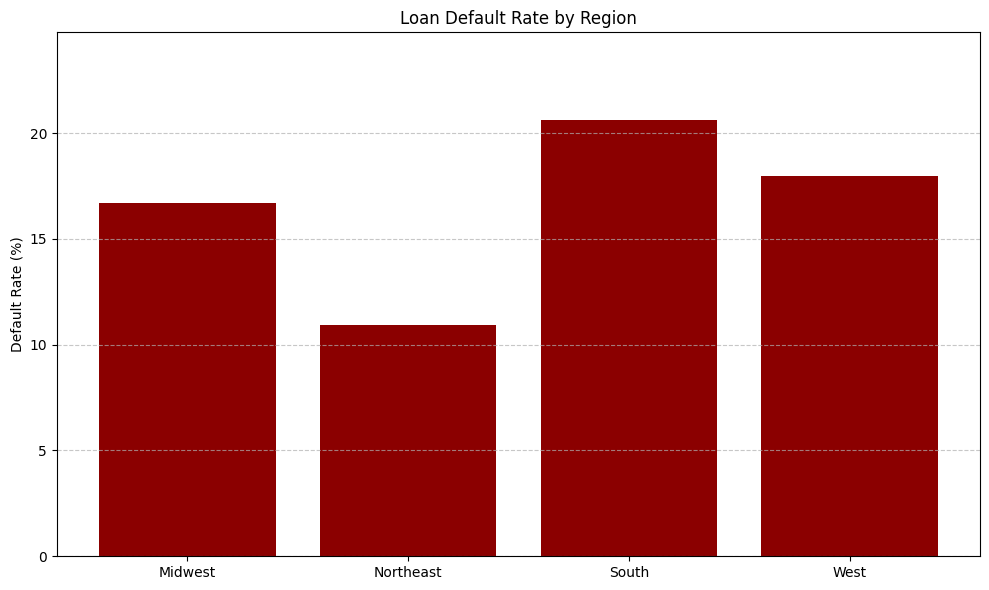

In [28]:
# Create functions that categorize state into regions
def assign_region(state):
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    midwest = ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    south = ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']

    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

# Add region column
data_cleaned['Region'] = data_cleaned['State'].apply(assign_region)

# Compare default rates by region
region_default = data_cleaned.groupby('Region')['Defaulted'].mean() * 100
region_default = region_default.reset_index()

# Visualize with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_default['Region'], region_default['Defaulted'], color='darkred')
plt.title('Loan Default Rate by Region')
plt.ylabel('Default Rate (%)')
plt.ylim(0, max(region_default['Defaulted']) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('default_by_region.png', dpi=300)
plt.show()

## Multivariate Analysis

The correlation heatmap reveals several insights into the relationships between key loan-related variables:
Loan Term has a moderate negative correlation with default status (Defaulted, r = -0.32), indicating that loans with longer terms tend to have lower default rates.
Most other variables, such as NoEmp (Number of Employees), CreateJob, and RetainedJob, show very weak or no correlation with default status.
UrbanRural shows a small positive correlation (r = 0.16) with default, suggesting that loans in rural areas might be slightly more prone to default compared to urban ones.
There is an extremely strong correlation between CreateJob and RetainedJob (r = 0.99), which is expected, as these two employment-related features likely measure similar business activity.

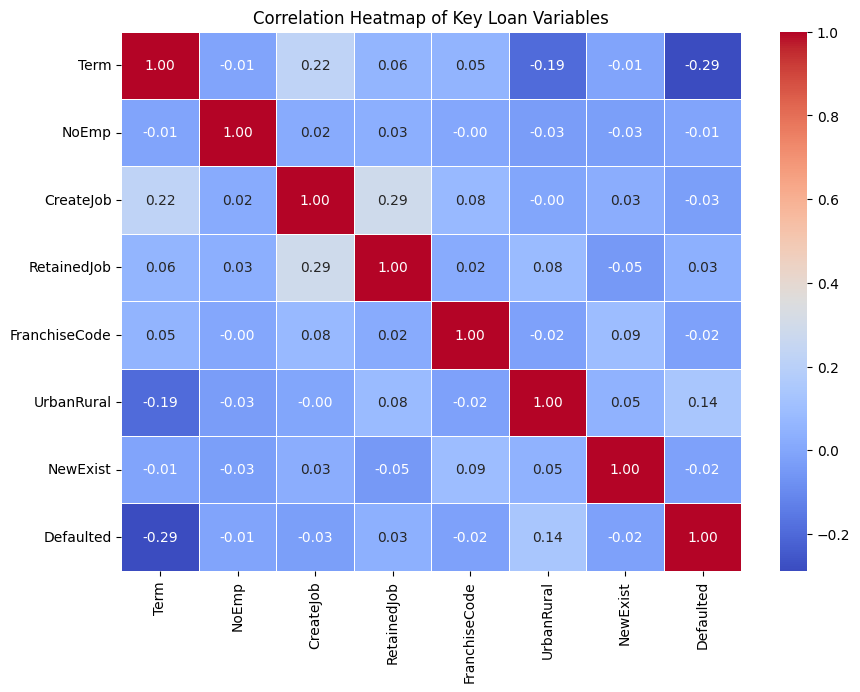

In [29]:
# Select numeric variables relevant for correlation analysis
heatmap_data = data_cleaned[['Term', 'NoEmp', 'CreateJob', 'RetainedJob',
                             'FranchiseCode', 'UrbanRural', 'NewExist', 'Defaulted']]

# Calculate the correlation matrix
corr_matrix = heatmap_data.corr()

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Loan Variables")
plt.show()

To better understand the combined influence of multiple factors on loan default, we developed a multivariate logistic regression model using five key predictors: loan term (Term), number of employees (NoEmp), business age (NewExist), location type (UrbanRural), and franchise status (FranchiseCode). Which offers more comprehensive information than the previous single-variable model, capturing a fuller picture of what drives loan defaults. The goal was to explore how these variables jointly impact the likelihood of a loan being charged off. All five predictors were statistically significant (p < 0.001), and the model's pseudo R-squared improved to 0.1793. Key findings from the multivariate model include:

Term remained a strong negative predictor of default.
UrbanRural had a strong positive effect (coef = 0.4513), indicating that rural loans are more likely to default.
FranchiseCode, though numerically small, was highly significant, suggesting franchise businesses may have distinct risk characteristics.
NoEmp (number of employees) and NewExist (new vs. existing business) also contributed meaningfully, with smaller businesses and new ones showing higher default risk.

In [30]:
# Multivariate Graphs - Multivariate Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import statsmodels.api as sm

# Select input features for the model
features = ['Term', 'NoEmp', 'NewExist', 'UrbanRural', 'FranchiseCode']
X = data_cleaned[features]
y = data_cleaned['Defaulted']

# Convert non-numeric values and handle missing data
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # or use X.fillna(X.median()) if preferred
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Add constant (intercept) term
X_sm = sm.add_constant(X)

# Fit the model using statsmodels
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()

# Print full summary with coefficients and p-values
print(result.summary())

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1205
           1       0.65      0.22      0.32       235

    accuracy                           0.85      1440
   macro avg       0.76      0.60      0.62      1440
weighted avg       0.83      0.85      0.82      1440

Confusion Matrix:
 [[1177   28]
 [ 184   51]]
Accuracy Score: 0.8527777777777777
Optimization terminated successfully.
         Current function value: 0.375864
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Defaulted   No. Observations:                 4799
Model:                          Logit   Df Residuals:                     4793
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Apr 2025   Pseudo R-squ.:                  0.1756
Time:                        21:27:52   Log-Likelihood:                

## Synthesis

By synthesizing descriptive and inferential statistics with our visual and comparative analyses, we gained a comprehensive understanding of how loan performance varies across states, industries, and borrower characteristics.

For Research Question 1, we found that loan default rates differ significantly by state. Florida (FL), Georgia (GA), and Washington D.C. (DC) had the highest default rates, exceeding 23%. Geographic visualizations, such as the choropleth map and bar plots, helped clearly highlight these regional patterns. States with higher default rates also tended to have loans issued to smaller businesses, as shown by lower average employee counts. The integration of geographic shapefiles allowed us to map this variation, which would not be possible using the loan dataset alone.

Regarding Research Question 2, inferential statistics confirmed that loan term and borrower location significantly impact loan outcomes. Logistic regression showed that longer loan terms are associated with a lower likelihood of default (p < 0.001), and the negative coefficient confirmed this inverse relationship. Additionally, a chi-squared test demonstrated a strong association between the success of a loan and whether the borrower is in an urban or rural area (p < 0.001). These statistical findings supported our earlier visual observations, such as the boxplot showing that smaller firms (with fewer employees) are more likely to default.

For Research Question 3, we analyzed how loans are distributed across industry sectors. Retail Trade, Other Services, and Accommodation & Food Services received the most loans, while sectors like Public Administration and Utilities had the fewest. This reflects the real-world financing needs of small businesses, particularly in service-oriented industries.

Our graphical analysis provided additional insight into financial behavior. The histogram of loan disbursement amounts revealed a strong right-skew, suggesting most loans are relatively small. Our comparative analysis found that smaller loans have a much higher default rate (24.29%) compared to large loans (11.06%), reinforcing the idea that low-capital borrowers face higher financial risk. Regionally, default rates were highest in the South, while the West and Northeast had relatively lower rates.

Overall, combining the SBA loan dataset with geographic and demographic data enriched our analysis by allowing for spatial, economic, and social perspectives. This multidimensional approach gave us clearer insights than any individual dataset could, helping us answer complex questions about loan approval, risk, and performance.

## Reflection

This project gave us a valuable opportunity to apply data analysis skills to a real-world business problem. Throughout the process, we faced several challenges—especially with data cleaning and integration.

At the beginning, we only cleaned a few key columns like 'City' and 'State,' thinking that would be enough for our analysis. However, as the project progressed, we realized that other columns—such as 'BankState,' 'NewExist,' 'DisbursementDate,' and ''MIS_Status' also had missing or inconsistent values that affected the quality of our results. We had to go back and expand the data cleaning process, which unfortunately meant that some of the conclusions and visualizations we had already written had to be revised or redone. This caused some delays and time loss. Therefore, this gave us a lesson that it is important to clean the whole dataset before analyzing.

What's more, we find that it is important to have structured analytical flow, which is to say have clear thinking thorughout the analyze work. By carefully structuring our approach from data cleaning through analysis and visualization to interpretation, we were able to transform raw loan data into actionable lending insights. The systematic workflow allowed us to overcome technical challenges and maintain focus on answering key analysis questions. This structured approach to data analysis ensured our work remained practical and insightful, providing clear direction for loan risk management strategies.

However, there might be some limitations in our analysis. For example, when dealing with missing value, we choose to drop the whole row of the data, instead of imputing values. This would definitely reduce the dataset size. The smaller dataset size may not fully represent the fully population of the loan, which may lead to some deviation on the analytical result and insights. However, after our discussion, we still choose to delete rows with missing values because we want to keep the actual data, and prioritize the data integrity in our analytical work. For further inprovement, we may do more research to consider whether to impute values when encountering missing values.

What's more, we find we did not conduct analysis regarding time. For further improvements, I think it would be better to conduct time series analysis to examine how default rates change over time which could reveal important trends or cyclical patterns that might influence lending strategies.

Overall, we think this project provides a valuable opportunity to work on combine two datasets, and get valuable and practical insights with analytical work by struturing analytical flow organized.

# Part 3: Machine Learning

**Preprocessing Data **

In [31]:
data_cleaned.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Defaulted,PaidInFull,NAICS_Sector,LoanSize,Region
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,$0.00,P I F,NaN,"$60,000.00","$48,000.00",0,True,Retail Trade,Medium Loan,Midwest
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,$0.00,P I F,NaN,"$40,000.00","$32,000.00",0,True,Accommodation & Food Services,Small Loan,Midwest
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,$0.00,P I F,NaN,"$287,000.00","$215,250.00",0,True,Health Care & Social Assistance,Large Loan,Midwest
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,$0.00,P I F,NaN,"$35,000.00","$28,000.00",0,True,Unknown,Small Loan,South
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,$0.00,P I F,NaN,"$229,000.00","$229,000.00",0,True,Unknown,Large Loan,South


In [32]:
money_cols = ['DisbursementGross', 'GrAppv', 'SBA_Appv', 'BalanceGross']

for col in money_cols:
    data_cleaned[col] = pd.to_numeric(
        data_cleaned[col].astype(str).str.replace(r'[\$,]', '', regex=True),
        errors='coerce'
    )

In [33]:
numerical_cols = [
    'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
    'DisbursementGross', 'BalanceGross', 'GrAppv',
    'SBA_Appv'
]

categorical_cols = [
    'State', 'Zip', 'BankState', 'NAICS', 'ApprovalFY',
    'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Region', 'LoanSize'
]

In [34]:
for col in categorical_cols:
    data_cleaned[col] = data_cleaned[col].astype(str)

Feature Selection Explanation
We selected a combination of numerical and categorical variables that are both interpretable and potentially predictive of loan default. For example, we used naics_prefix instead of the raw NAICS code to reduce dimensionality and improve interpretability, since NAICS is a purely categorical identifier with no ordinal meaning.

We included LoanSize as a key numeric feature, as it directly reflects the scale of the loan and is central to credit risk evaluation. Similarly, FranchiseCode and NewExist were retained because franchise affiliation and whether a business is newly established can significantly impact default likelihood.

Geographic variables like State and Region were used instead of Zip to avoid sparse encoding and better capture broad regional trends. We also included ApprovalFY as a categorical feature to account for differences across fiscal years, such as economic cycles or policy changes.

Overall, our feature set balances complexity and explanatory power, helping the model capture meaningful patterns without overfitting.

### Feature scaling and normalization; one-hot encoding/categorical variable handling； Dimensionality reduction techniques

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])
pca = PCA(n_components=100, svd_solver='randomized', random_state=42)

### Preprocessing justification and impact analysis

To prepare the dataset for classification, we applied a structured preprocessing pipeline using ColumnTransformer. For numerical features, we first standardized them using StandardScaler to ensure they are on a similar scale. This is crucial because models like logistic regression and PCA are sensitive to differences in feature magnitudes. After scaling, we applied Principal Component Analysis (PCA) to reduce dimensionality while retaining 95% of the variance in the data. This helps eliminate redundancy, reduce noise, and improve computational efficiency during model training. For categorical variables, we used OneHotEncoder to convert string-based values into binary vectors, as most machine learning models require purely numeric input. We also enabled handle_unknown='ignore' to avoid errors during inference if unseen categories appear. This preprocessing approach not only ensures compatibility with various classification algorithms, but also improves model performance by reducing overfitting risk and enhancing feature interpretability. Overall, the pipeline aligns with our goal of building a clean, scalable, and generalizable model.

## Implementation of chosen techniques：Classification Analysis

** Clear Definition and Justification of Goals **

The primary goal of this project is to build a classification model that can predict whether a small business loan will be successfully paid off ("P I F") or not ("CHGOFF"), based on various business, loan, and borrower characteristics. This goal is clearly suited for classification because the outcome variable (MIS_Status) is categorical and binary in nature. Accurately predicting loan repayment status can help financial institutions assess borrower risk, make informed lending decisions, and potentially reduce default rates. By leveraging historical SBA loan data, we aim to identify key patterns and relationships between business characteristics (such as loan size, number of employees, industry type, and documentation status) and loan performance. This approach aligns with real-world business objectives where risk assessment and credit scoring are critical, making classification the most appropriate analytical technique for this task.

In [39]:
# set x and y
X = data_cleaned[numerical_cols + categorical_cols]
y = data_cleaned['Defaulted']

In [40]:
# split x and y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [42]:


full_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', RandomForestClassifier(random_state=42))
])

full_pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [43]:
# fit the two pipelines
full_pipeline_rf.fit(X_train, y_train)
full_pipeline_gb.fit(X_train, y_train)

# predict
y_pred_rf = full_pipeline_rf.predict(X_test)
y_pred_gb = full_pipeline_gb.predict(X_test)

### Parameter optimization and method tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest parameter grid
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# Gradient Boosting parameter grid
param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.1, 0.05],
    'classifier__max_depth': [3, 5]
}

# pipeline
grid_rf = GridSearchCV(full_pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_gb = GridSearchCV(full_pipeline_gb, param_grid_gb, cv=5, scoring='f1', n_jobs=-1)

grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Term',
                                                                          'NoEmp',
                                                                          'CreateJob',
                                                                          'RetainedJob',
                                                                          'FranchiseCode',
                                                                          'DisbursementGross',
                                                                          'BalanceGross',
                                                                          'GrAppv',
                                                                          'SBA_Appv']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most...
                                                                          'ApprovalFY',
                                                                          'NewExist',
                                                                          'UrbanRural',
                                                                          'RevLineCr',
                                                                          'LowDoc',
                                                                          'Region',
                                                                          'LoanSize'])])),
                                       ('pca',
                                        PCA(n_components=100, random_state=42,
                                            svd_solver='randomized')),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.05],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1')

### Performance evaluation and metric selection

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_rf = grid_rf.predict(X_test)
y_pred_gb = grid_gb.predict(X_test)

print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\n=== Gradient Boosting Report ===")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       797
           1       0.90      0.43      0.58       163

    accuracy                           0.89       960
   macro avg       0.90      0.71      0.76       960
weighted avg       0.90      0.89      0.88       960

Confusion Matrix:
 [[789   8]
 [ 93  70]]
Accuracy: 0.8947916666666667

=== Gradient Boosting Report ===
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       797
           1       0.80      0.52      0.63       163

    accuracy                           0.90       960
   macro avg       0.86      0.75      0.79       960
weighted avg       0.89      0.90      0.89       960

Confusion Matrix:
 [[776  21]
 [ 78  85]]
Accuracy: 0.896875


To evaluate model performance, we used accuracy, precision, recall, F1-score, and confusion matrix. While accuracy provides an overall measure of performance, we also focused on recall and F1-score, especially for the minority class (label 1), since misclassifying positive cases may be more costly depending on the context (e.g., detecting defaulters, fraud, or high-risk applicants). These metrics help us understand both the correctness and robustness of our models, especially under class imbalance.

In [ ]:
print("Best RF params:", grid_rf.best_params_)
print("Best GB params:", grid_gb.best_params_)

Best RF params: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Best GB params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}


### Interpretation and discussion of results

We compared two models: Random Forest and Gradient Boosting. Both models achieved similar overall accuracy (~89.5–89.7%), but their performance diverged when analyzing class-specific metrics.

Random Forest achieved strong performance in detecting the majority class (0), with very high recall (0.99) and F1-score (0.94). However, it struggled with the minority class (1), yielding a low recall of 0.43 and an F1-score of 0.58. This indicates the model misses a large portion of actual positive cases.

Gradient Boosting, on the other hand, had slightly lower recall for class 0 (0.97) but significantly better recall (0.52) and F1-score (0.63) for class 1. This model offers a more balanced performance across both classes, making it more suitable when identifying the minority class is important.

In summary, although Random Forest performs slightly better on the majority class, Gradient Boosting provides better overall class balance, particularly in identifying minority class instances. Given the application context where recall for class 1 is valuable, Gradient Boosting would be the preferred model despite a marginally higher error rate on class 0.

